C:\Users\ishan\AppData\Local\Temp\ipykernel_38316\2223943389.py:38: RuntimeWarning: invalid value encountered in double_scalars
  class_mean2 = (global_mean - cum_mean[threshold]) / class_prob2


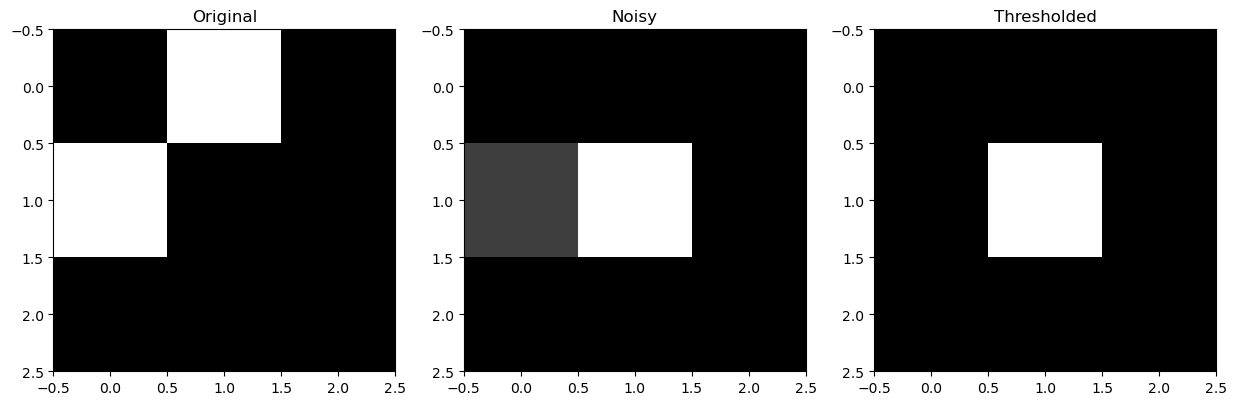

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def otsu_threshold(image):
    # Compute histogram and probabilities of each intensity level
    hist, bins = np.histogram(image, bins=range(257))
    prob = hist / float(np.sum(hist))
    
    # Compute cumulative sums
    cum_sum = np.cumsum(prob)
    cum_mean = np.cumsum(prob * np.arange(256))
    
    # Compute global mean intensity
    global_mean = cum_mean[-1]
    
    # Compute between-class variance for all possible thresholds
    threshold_values = range(1, 256)
    between_class_variances = np.zeros(len(threshold_values))
    
    for i, threshold in enumerate(threshold_values):
        # Compute class probabilities and means
        class_prob1 = cum_sum[threshold]
        class_prob2 = 1.0 - class_prob1
        class_mean1 = cum_mean[threshold] / class_prob1
        class_mean2 = (global_mean - cum_mean[threshold]) / class_prob2
        
        # Compute between-class variance
        between_class_variances[i] = class_prob1 * class_prob2 * (class_mean1 - class_mean2) ** 2
    

    optimal_threshold = threshold_values[np.argmax(between_class_variances)]
    

    thresholded_image = np.zeros_like(image)
    thresholded_image[image >= optimal_threshold] = 1
    
    return thresholded_image

def add_gaussian_noise(image, mean=0, std_dev=1):
    
    noise = np.random.normal(mean, std_dev, image.shape)
    
    noisy_image = image + noise
    
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    
    return noisy_image



image = np.zeros((3, 3), dtype=np.uint8)
image[1, 1] = 1
image[1, 0] = 1
noisy_image = add_gaussian_noise(image, mean=0, std_dev=50)

# Threshold noisy image using Otsu's algorithm
thresholded_image = otsu_threshold(noisy_image)

# Display original, noisy, and thresholded images
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 5))

ax1.imshow(image, cmap='gray')


ax2.imshow(noisy_image, cmap='gray')


ax3.imshow(thresholded_image, cmap='gray')


plt.show()


In [5]:
import numpy as np

def region_growing(image, seed_coords, threshold_range):
  
    # Initialize segmented image and list of unprocessed pixels
    segmented = np.zeros_like(image)
    to_process = [seed_coords]

    # Define function to check if a pixel is within threshold range
    def is_in_threshold_range(coord):
        pixel_value = image[coord[1], coord[0]]
        return threshold_range[0] <= pixel_value <= threshold_range[1]

    # Recursively process unprocessed pixels
    while len(to_process) > 0:
        # Get next pixel to process
        current_coord = to_process.pop()

        # Check if pixel is within threshold range
        if is_in_threshold_range(current_coord):
            # Add pixel to segmented image and mark as processed
            segmented[current_coord[1], current_coord[0]] = 1

            # Add neighboring pixels to list of unprocessed pixels
            for neighbor_coord in ((current_coord[0] - 1, current_coord[1]),
                                   (current_coord[0] + 1, current_coord[1]),
                                   (current_coord[0], current_coord[1] - 1),
                                   (current_coord[0], current_coord[1] + 1)):
                if (neighbor_coord[0] >= 0 and neighbor_coord[0] < image.shape[1] and
                    neighbor_coord[1] >= 0 and neighbor_coord[1] < image.shape[0] and
                    not segmented[neighbor_coord[1], neighbor_coord[0]] and
                    neighbor_coord not in to_process):
                    to_process.append(neighbor_coord)

    return segmented



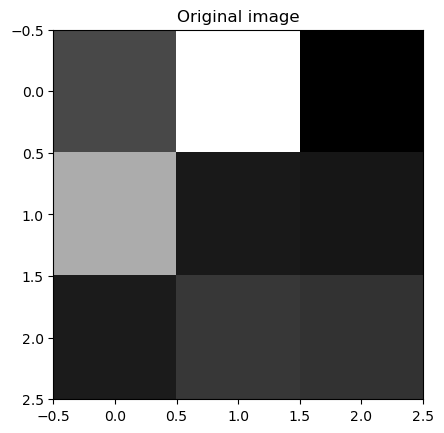

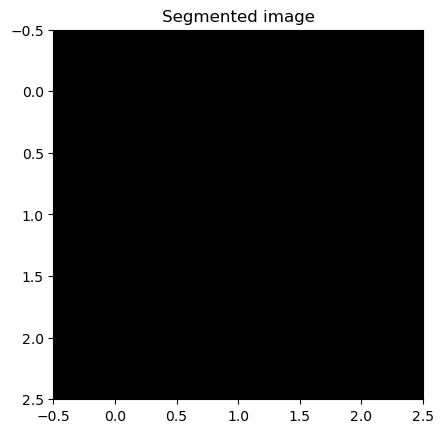

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Generate test image with two objects and some noise
image = np.zeros((3,3))
image[1,0] = 1
image[0,1] = 1
image += 0.2 * np.random.randn(*image.shape)

# Show original image
plt.imshow(image, cmap='gray')
plt.title('Original image')
plt.show()

# Choose seed coordinates for one of the objects
seed_coords = (1, 1)

# Define threshold range for region growing
threshold_range = (0.5, 1)


segmented = region_growing(image, seed_coords, threshold_range)


plt.imshow(segmented, cmap='gray')
plt.title('Segmented image')
plt.show()
